In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("AirPassengers.csv")
df.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [5]:
#rename columns
df.columns=['Date','Total Passengers']
df

,Date,Total Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:
df.head()

,Date,Total Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


C:\Users\hp\AppData\Local\Temp\ipykernel_7520\835178900.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df['Date'],rotation=90)


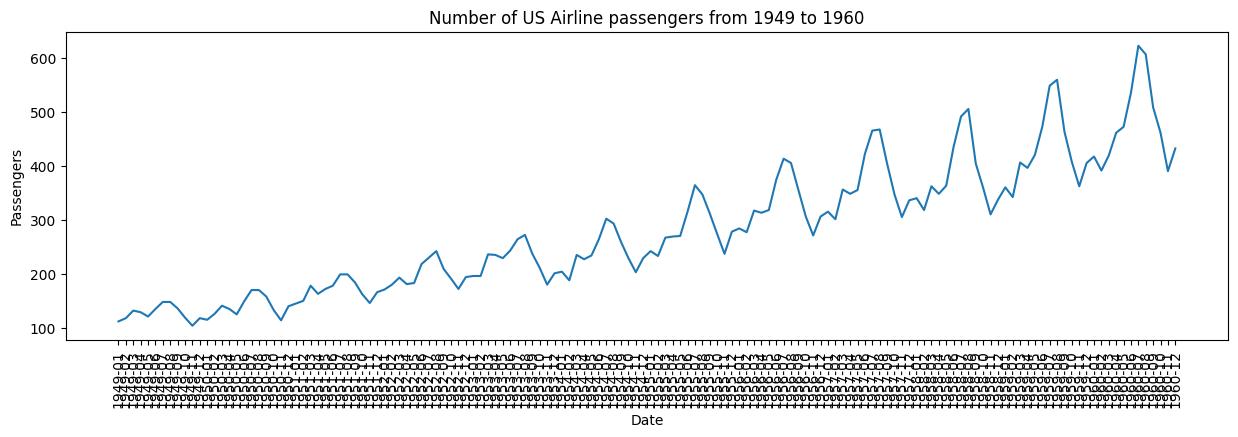

In [7]:
#Visualize Time Series
fig,ax=plt.subplots(figsize=(15,4))
ax.plot(df['Date'],df['Total Passengers'])
ax.set_title('Number of US Airline passengers from 1949 to 1960')
ax.set_ylabel('Passengers')
ax.set_xlabel('Date')
ax.set_xticklabels(labels=df['Date'],rotation=90)
plt.gca
plt.show()


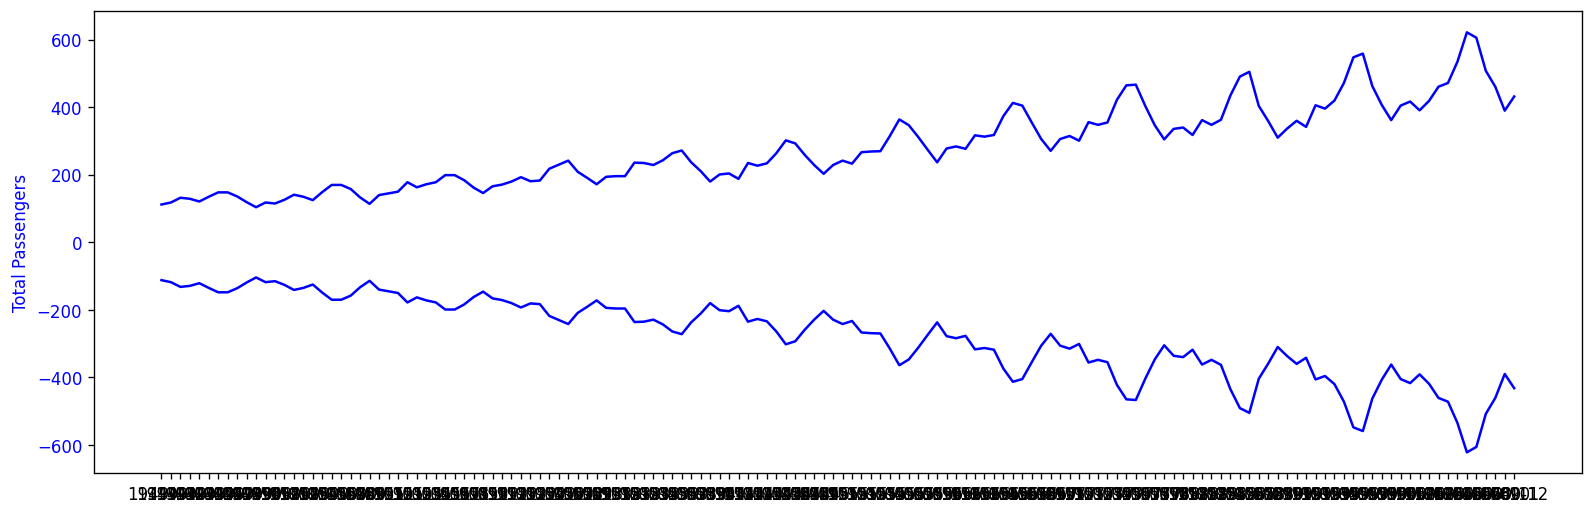

In [8]:
#To show Growth plot on both sides of Y axis
x=df['Date'].values
y1=df['Total Passengers'].values
y2=-y1


fig,ax1=plt.subplots(1,1,figsize=(16,5),dpi=120)
ax1.plot(x,y1,color='blue')
ax1.plot(x,y2,color='blue')
ax1.set_ylabel("Total Passengers",color='blue')
ax1.tick_params(axis='y',labelcolor='blue')
#set the Y-axis limits to include both positive and negative values
ymax = max(np.max(y1), np.max(y2))
ymin = min(np.min(y1), np.min(y2))
ax.set_ylim(ymin, ymax)
plt.show()







Patterns in a Time Series

C:\Users\hp\AppData\Local\Temp\ipykernel_7520\1234114978.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df['Date'],rotation=90)


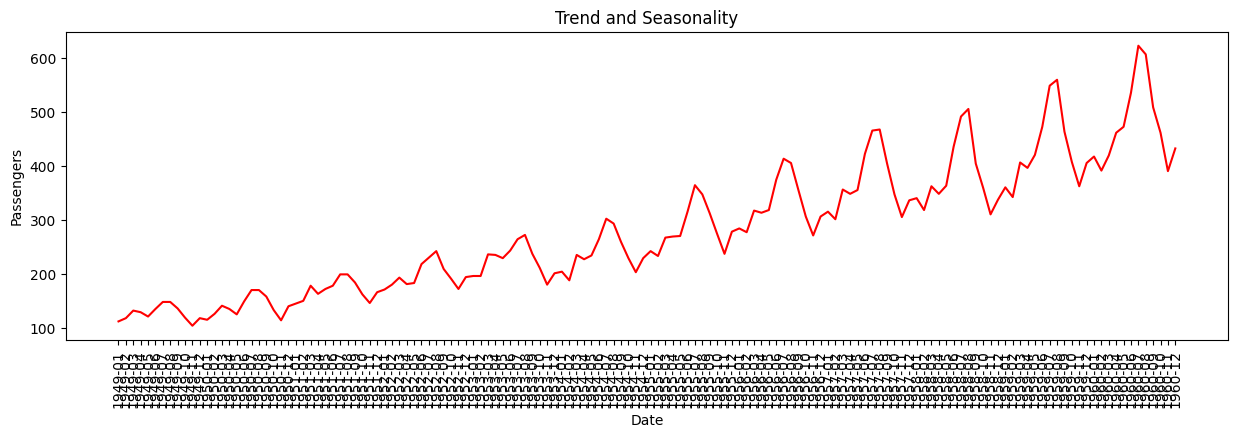

In [9]:
#Visualize Trend and Seasonality in a time series
fig,ax=plt.subplots(figsize=(15,4))
ax.plot(df['Date'],df['Total Passengers'],color='red')
ax.set_title('Trend and Seasonality')
ax.set_ylabel('Passengers')
ax.set_xlabel('Date')
ax.set_xticklabels(labels=df['Date'],rotation=90)
plt.gca
plt.show()


Decomposition of Time Series : Done by considering the series as either additive or multiplicative

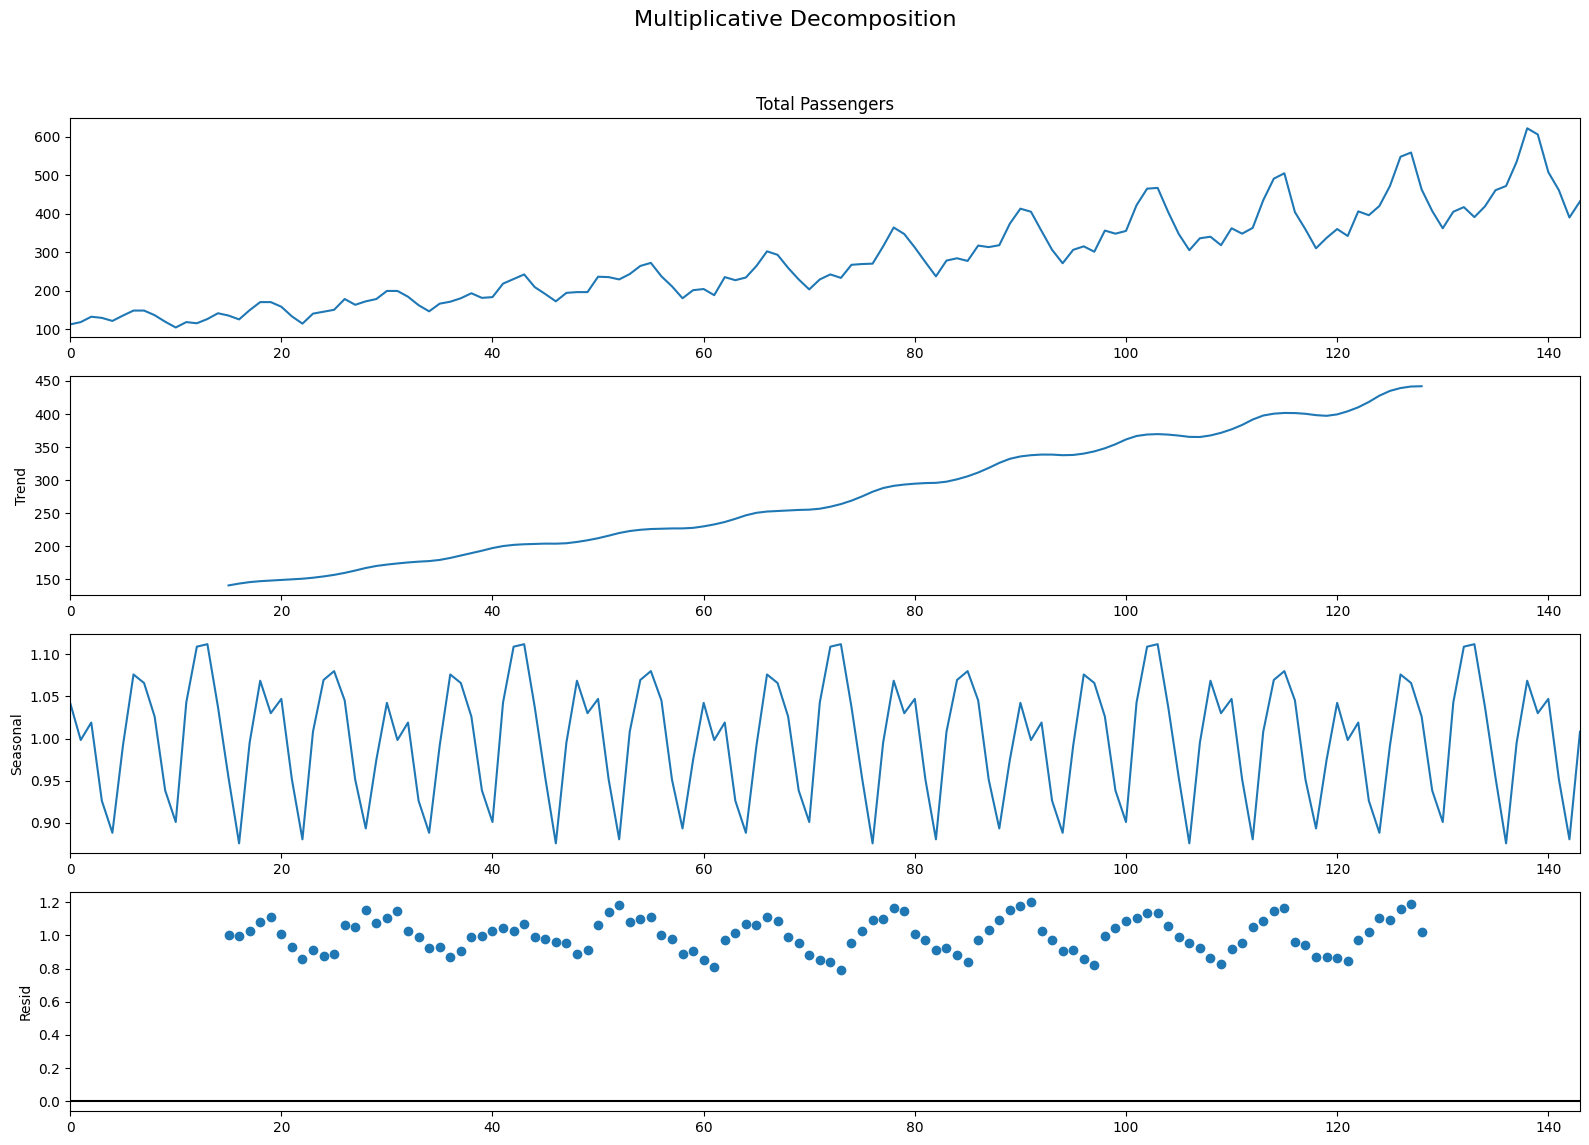

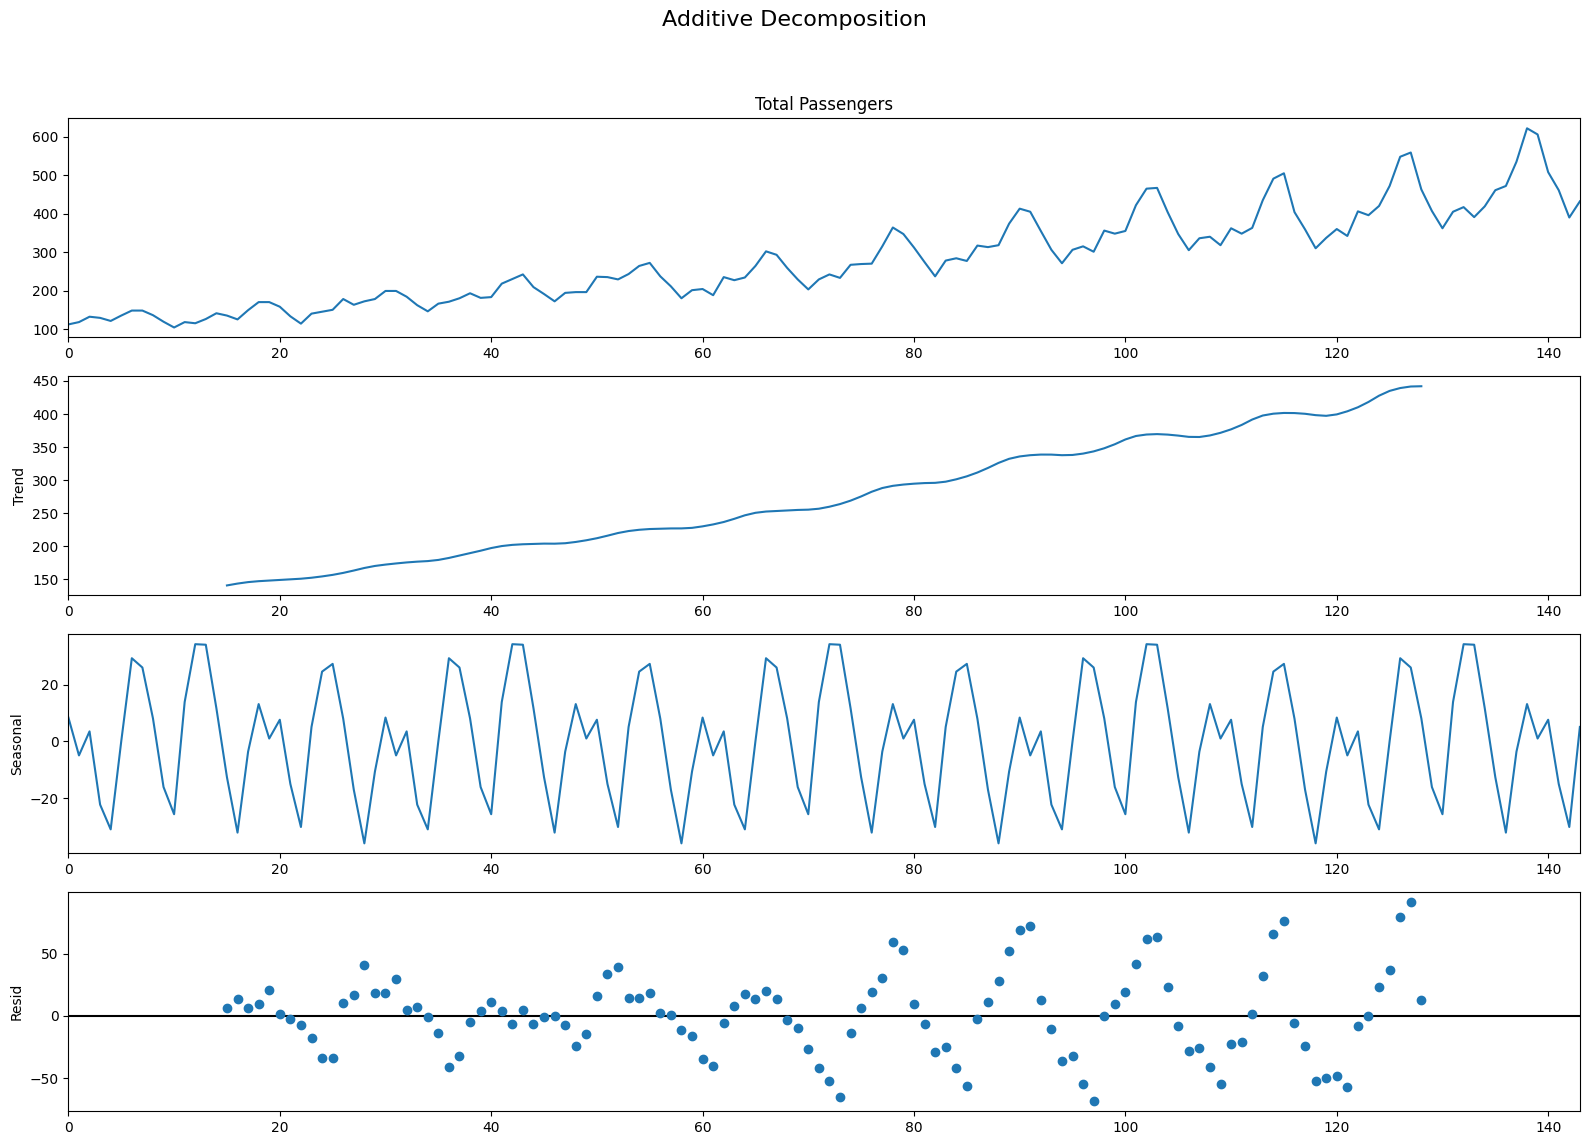

In [10]:
#The seasonal_decompose in statsmodels implements this conveniently.
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Total Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Total Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

If we look at the residuals of the additive decomposition closely, it has some pattern left over.


The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

Detrend a Time Series 

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the least squares fit')

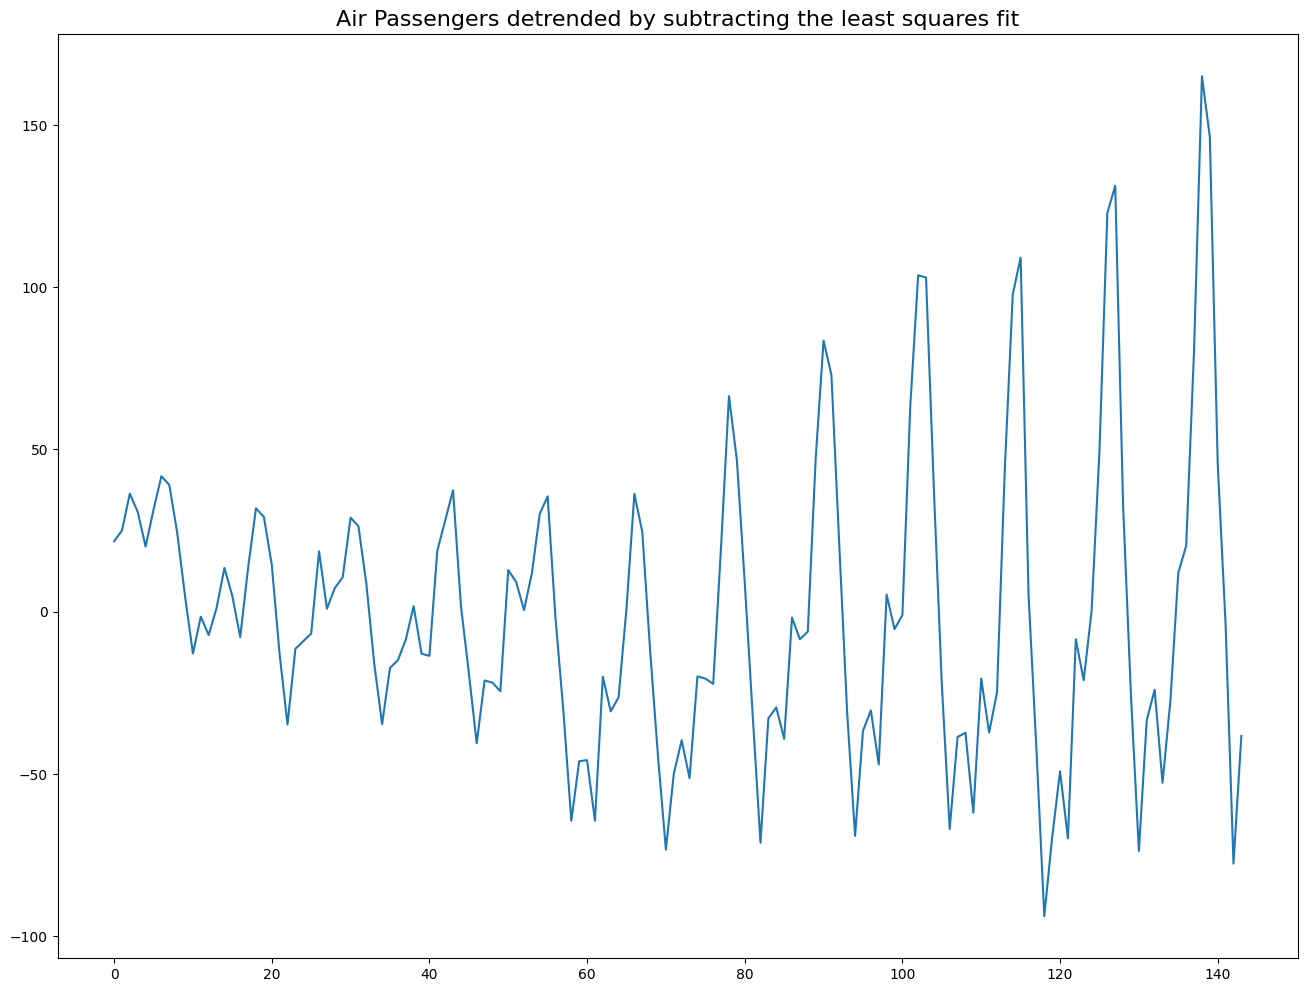

In [11]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(df['Total Passengers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the trend component')

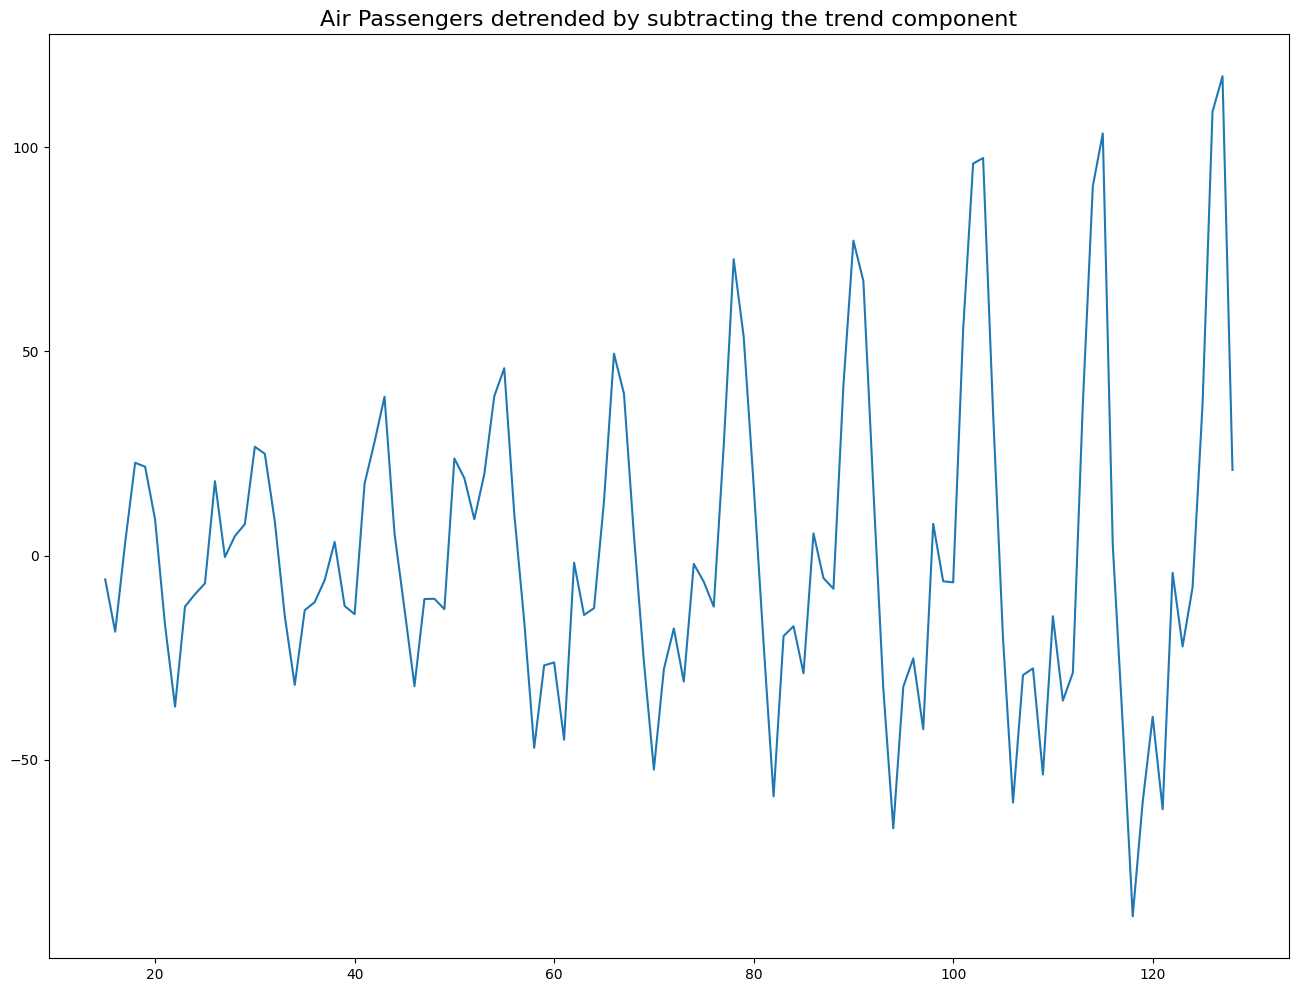

In [12]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['Total Passengers'], model='multiplicative', period=30)
detrended = df['Total Passengers'].values - result_mul.trend
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)

Deseasonalize a Time Series

[]

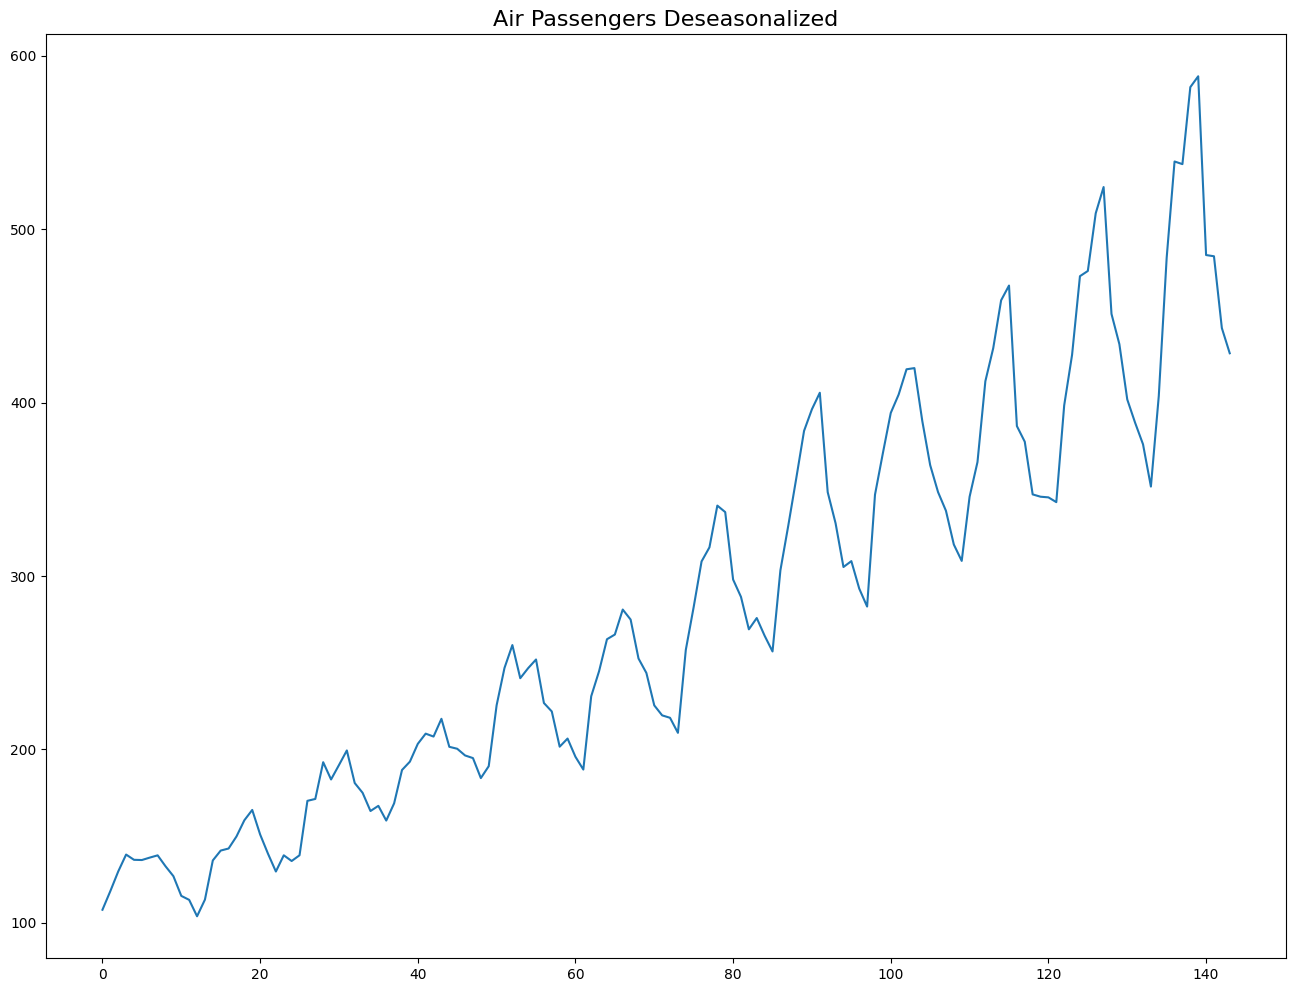

In [13]:
# Subtracting the Trend Component


# Time Series Decomposition
result_mul = seasonal_decompose(df['Total Passengers'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = df['Total Passengers'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot()

Test for seasonality of a time series

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

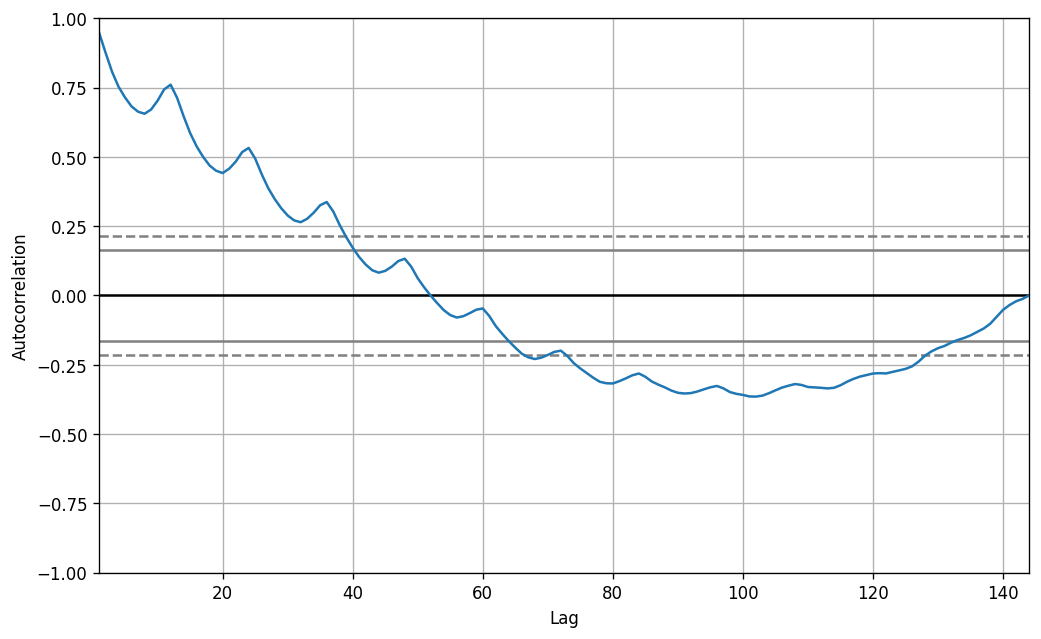

In [14]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Total Passengers'].tolist())

Autocorrelation and Partial Autocorrelation Functions

c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


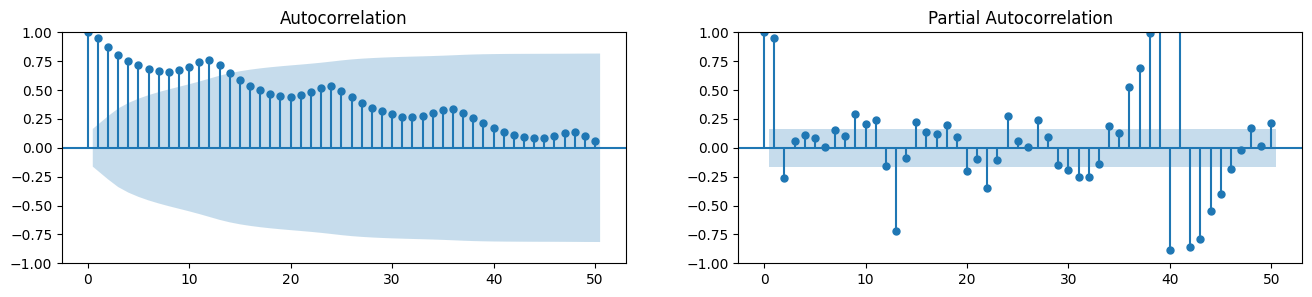

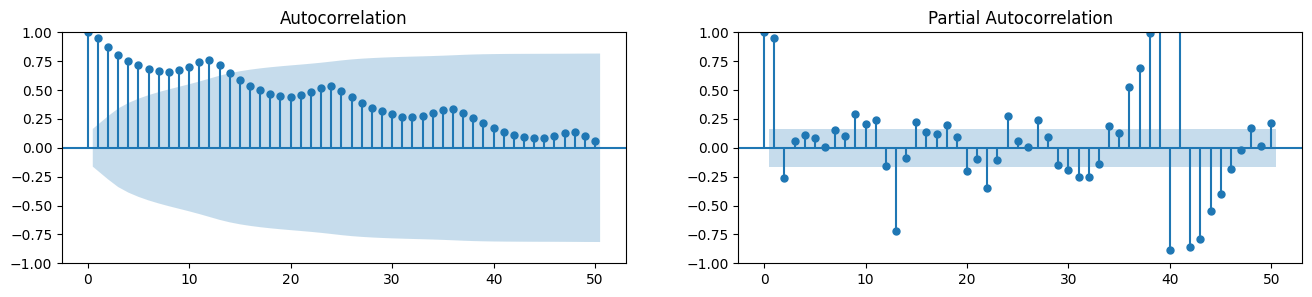

In [15]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Total Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Total Passengers'].tolist(), lags=50, ax=axes[1])

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

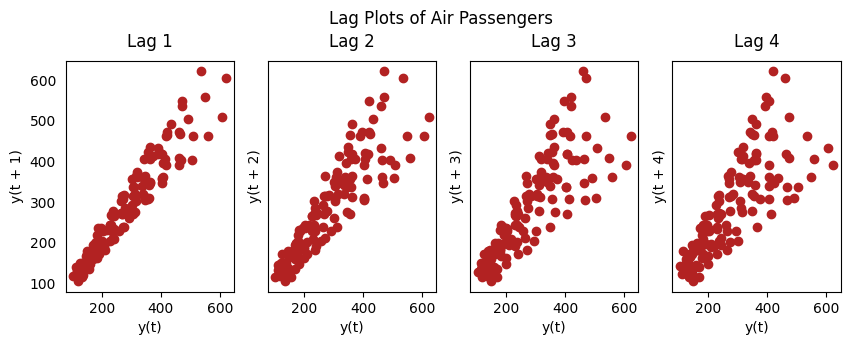

In [16]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Total Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()